In [20]:
import os
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint
import warnings
warnings.filterwarnings("ignore")
tf.random.set_seed(42)
np.random.seed(42)

print("Tensorflow successfully updated:", tf.__version__)

Tensorflow successfully updated: 2.16.1


In [17]:
pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


In [21]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [22]:
!pip install opendatasets

In [23]:
!pip install pandas

In [25]:
!pip install kaggle

In [26]:
import os

dataset_path = r"C:\Users\Saraswathi\OneDrive\Desktop\plant leaf\archive\dataset"
files = os.listdir(dataset_path)

print(files)


['test', 'train', 'validation']


In [27]:
train_path  = os.path.join(dataset_path, 'train')
validation_path = os.path.join(dataset_path, 'validation')
test_path = os.path.join(dataset_path,'test')

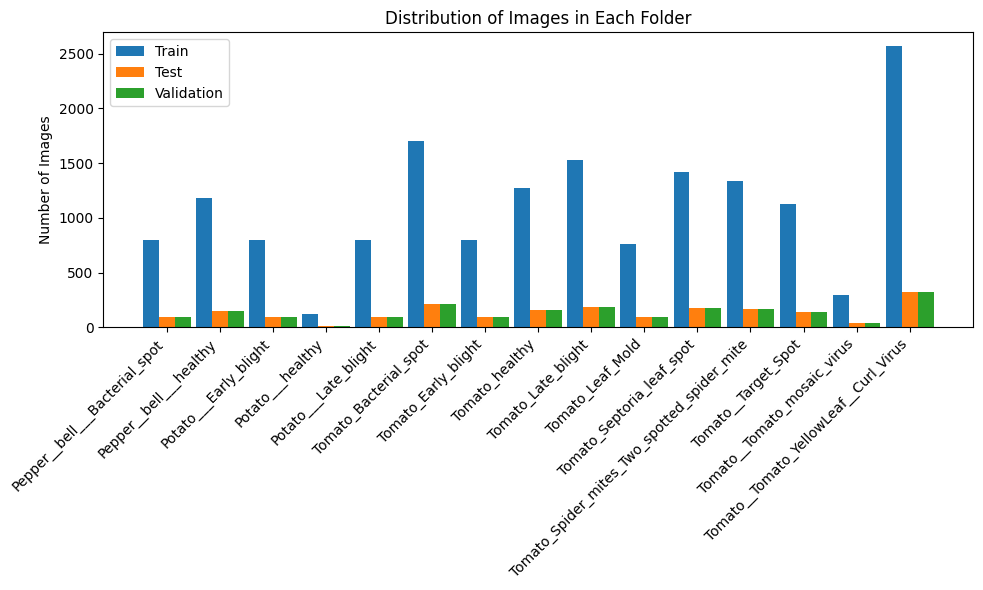

In [28]:
folders = ['train', 'test', 'validation']
subfolder_lengths = {folder: {} for folder in folders}
for folder in folders:
    subfolders = os.listdir(os.path.join(dataset_path,folder))
    for subfolder in subfolders:
        subfolder_length = len(os.listdir(os.path.join(dataset_path, folder, subfolder)))
        subfolder_lengths[folder][subfolder] = subfolder_length

subfolder_names = list(subfolder_lengths['train'].keys())
train_lengths = list(subfolder_lengths['train'].values())
test_lengths = list(subfolder_lengths['test'].values())
val_lengths = list(subfolder_lengths['validation'].values())

#Setting up parameters for the bar plot
x = np.arange(len(subfolder_names))
width = 0.3

#creating a bar plot

fig, ax = plt.subplots(figsize=(10,6))
rects1 = ax.bar(x-width, train_lengths,width, label = 'Train')
rects2 = ax.bar(x, test_lengths,width, label = 'Test')
rects3 = ax.bar(x+width, val_lengths,width, label = 'Validation')

#adding labels and legend to the plot

ax.set_ylabel('Number of Images')
ax.set_title('Distribution of Images in Each Folder')
ax.set_xticks(x)
ax.set_xticklabels(subfolder_names, rotation = 45 , ha = 'right')
ax.legend()

#Layout and displaying the plot
plt.tight_layout()
plt.show()

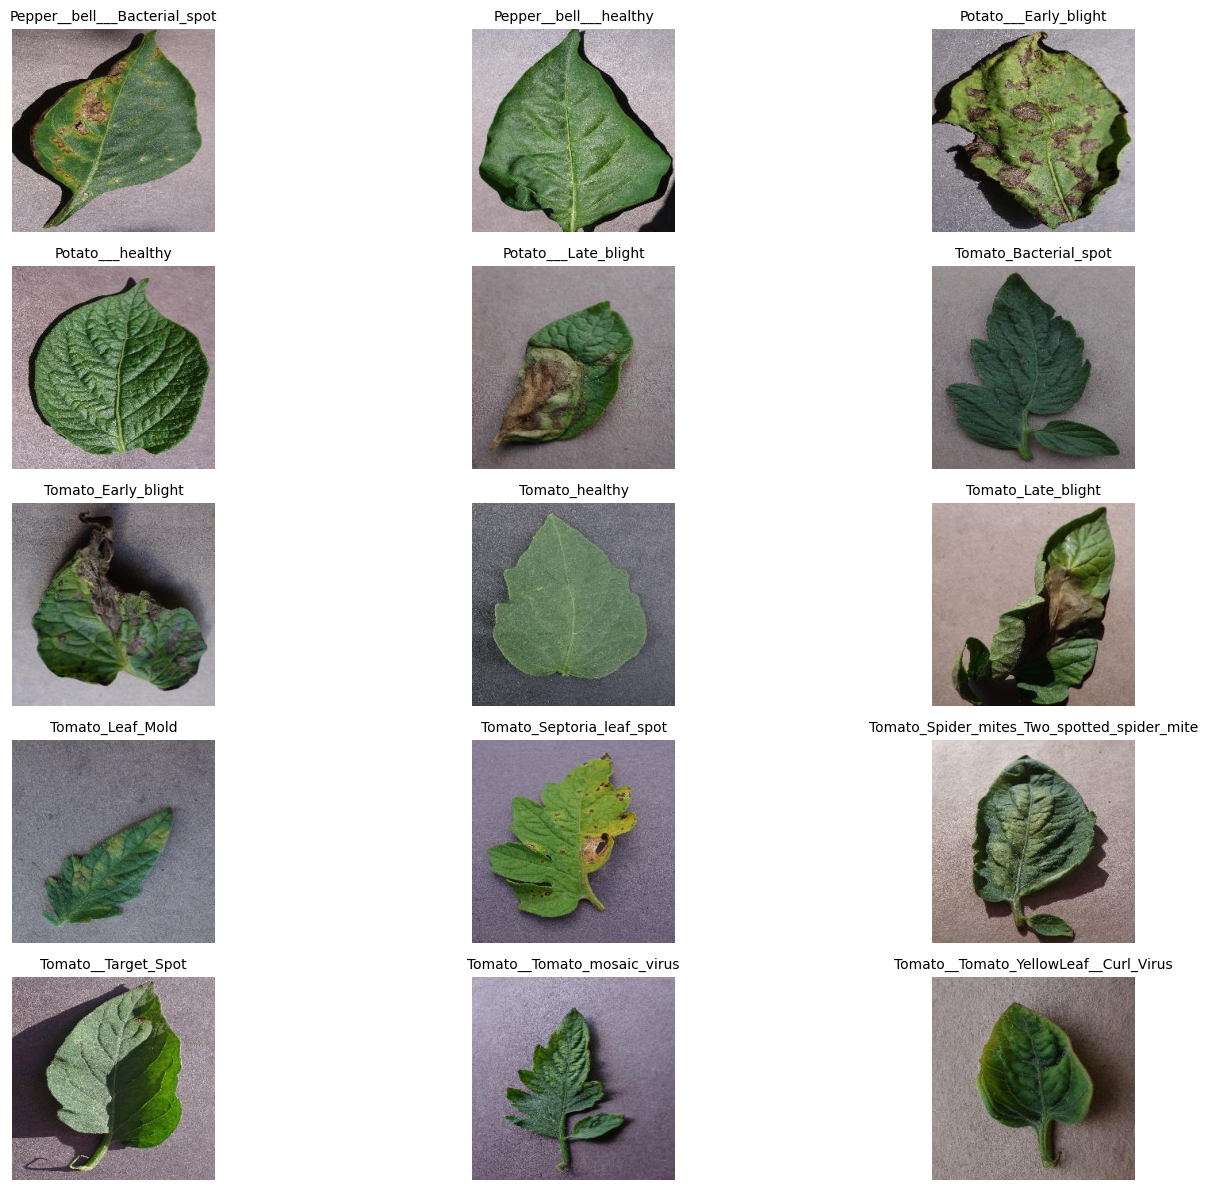

In [29]:
#Displaying Images from the Training Dataset

num_cols = 3
num_rows = 5

fig, axes = plt.subplots(num_rows, num_cols, figsize = (16, 12))
axes = axes.ravel()

for i,subfolder in enumerate(subfolders):
    img = [image for image in os.listdir(os.path.join(train_path,subfolder))][0]
    img_path = os.path.join(train_path,subfolder,img)
    img = mpimg.imread(img_path)
    axes[i].imshow(img)
    axes[i].axis('off')
    axes[i].set_title(subfolder, color='black', fontsize = 10)

plt.tight_layout()
plt.show()

In [30]:
#Image data Agumentation for training
batch_size = 32
image_shape = (256,256)

train_datagen = ImageDataGenerator(rescale =  1/ 255, 
                                   shear_range = 0.2, 
                                   horizontal_flip = True, 
                                   brightness_range = [0.5, 1.5], 
                                   rotation_range = 40, 
                                   zoom_range = 0.2)

train_generator = train_datagen.flow_from_directory(train_path,
                                                    target_size = image_shape,
                                                    batch_size = batch_size,
                                                    class_mode = "categorical")

Found 16504 images belonging to 15 classes.


In [31]:
validation_datagen = ImageDataGenerator(rescale = 1/255)
validation_generator = validation_datagen.flow_from_directory(validation_path,
                                                             target_size = image_shape,
                                                             batch_size = batch_size,
                                                             class_mode = "categorical")
    

Found 2070 images belonging to 15 classes.


In [32]:
test_datagen = ImageDataGenerator(rescale = 1/255)
test_generator = test_datagen.flow_from_directory(test_path,
                                                  target_size = image_shape,
                                                  batch_size = batch_size,
                                                  class_mode = "categorical",
                                                  shuffle = False)
    
    

Found 2064 images belonging to 15 classes.


In [33]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint

tf.random.set_seed(42)

# Build your CNN model

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))

model.add(Dense(15, activation='softmax'))

# Compile the model

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='categorical_crossentropy', metrics=['accuracy'])


# Define a ModelCheckpoint callback to save the best weights during training
checkpoint_callback = ModelCheckpoint("best_epoch_weights.h5", monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

model.summary()


ValueError: The filepath provided must end in `.keras` (Keras model format). Received: filepath=best_epoch_weights.h5